In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('titanic.csv')

In [18]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [19]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [20]:
inputs = df.drop(['Survived'],axis='columns')
target = df['Survived']

In [22]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [24]:
inputs.Sex = inputs.Sex.map({'male':1, 'female':2})

In [26]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [29]:
from sklearn import tree

In [30]:
model = tree.DecisionTreeClassifier()

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
model.predict(x_test)

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [35]:
model.score(x_test,y_test)

0.7653631284916201

[Text(0.4999933567176871, 0.975, 'x[1] <= 1.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]'),
 Text(0.18748671343537415, 0.925, 'x[2] <= 6.5\ngini = 0.317\nsamples = 461\nvalue = [370, 91]'),
 Text(0.3437400350765306, 0.95, 'True  '),
 Text(0.013605442176870748, 0.875, 'x[0] <= 2.5\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.006802721088435374, 0.825, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.02040816326530612, 0.825, 'x[3] <= 20.825\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.013605442176870748, 0.775, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.027210884353741496, 0.775, 'x[2] <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.02040816326530612, 0.725, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.034013605442176874, 0.725, 'x[2] <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.027210884353741496, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04081632653061224, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [

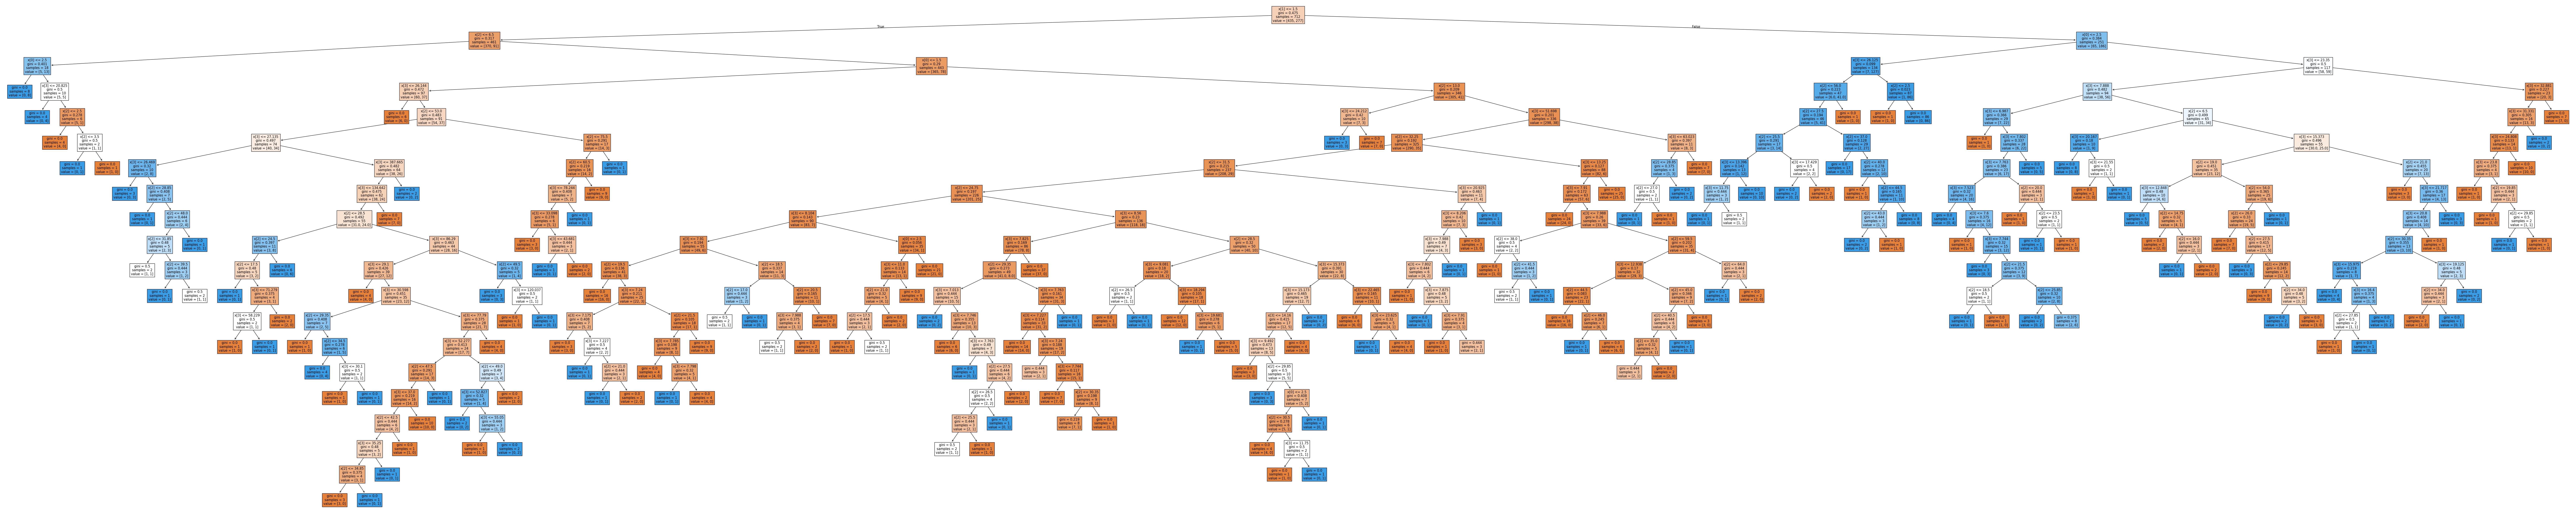

In [40]:
plt.figure(figsize=(150,30))
tree.plot_tree(model,filled=True)